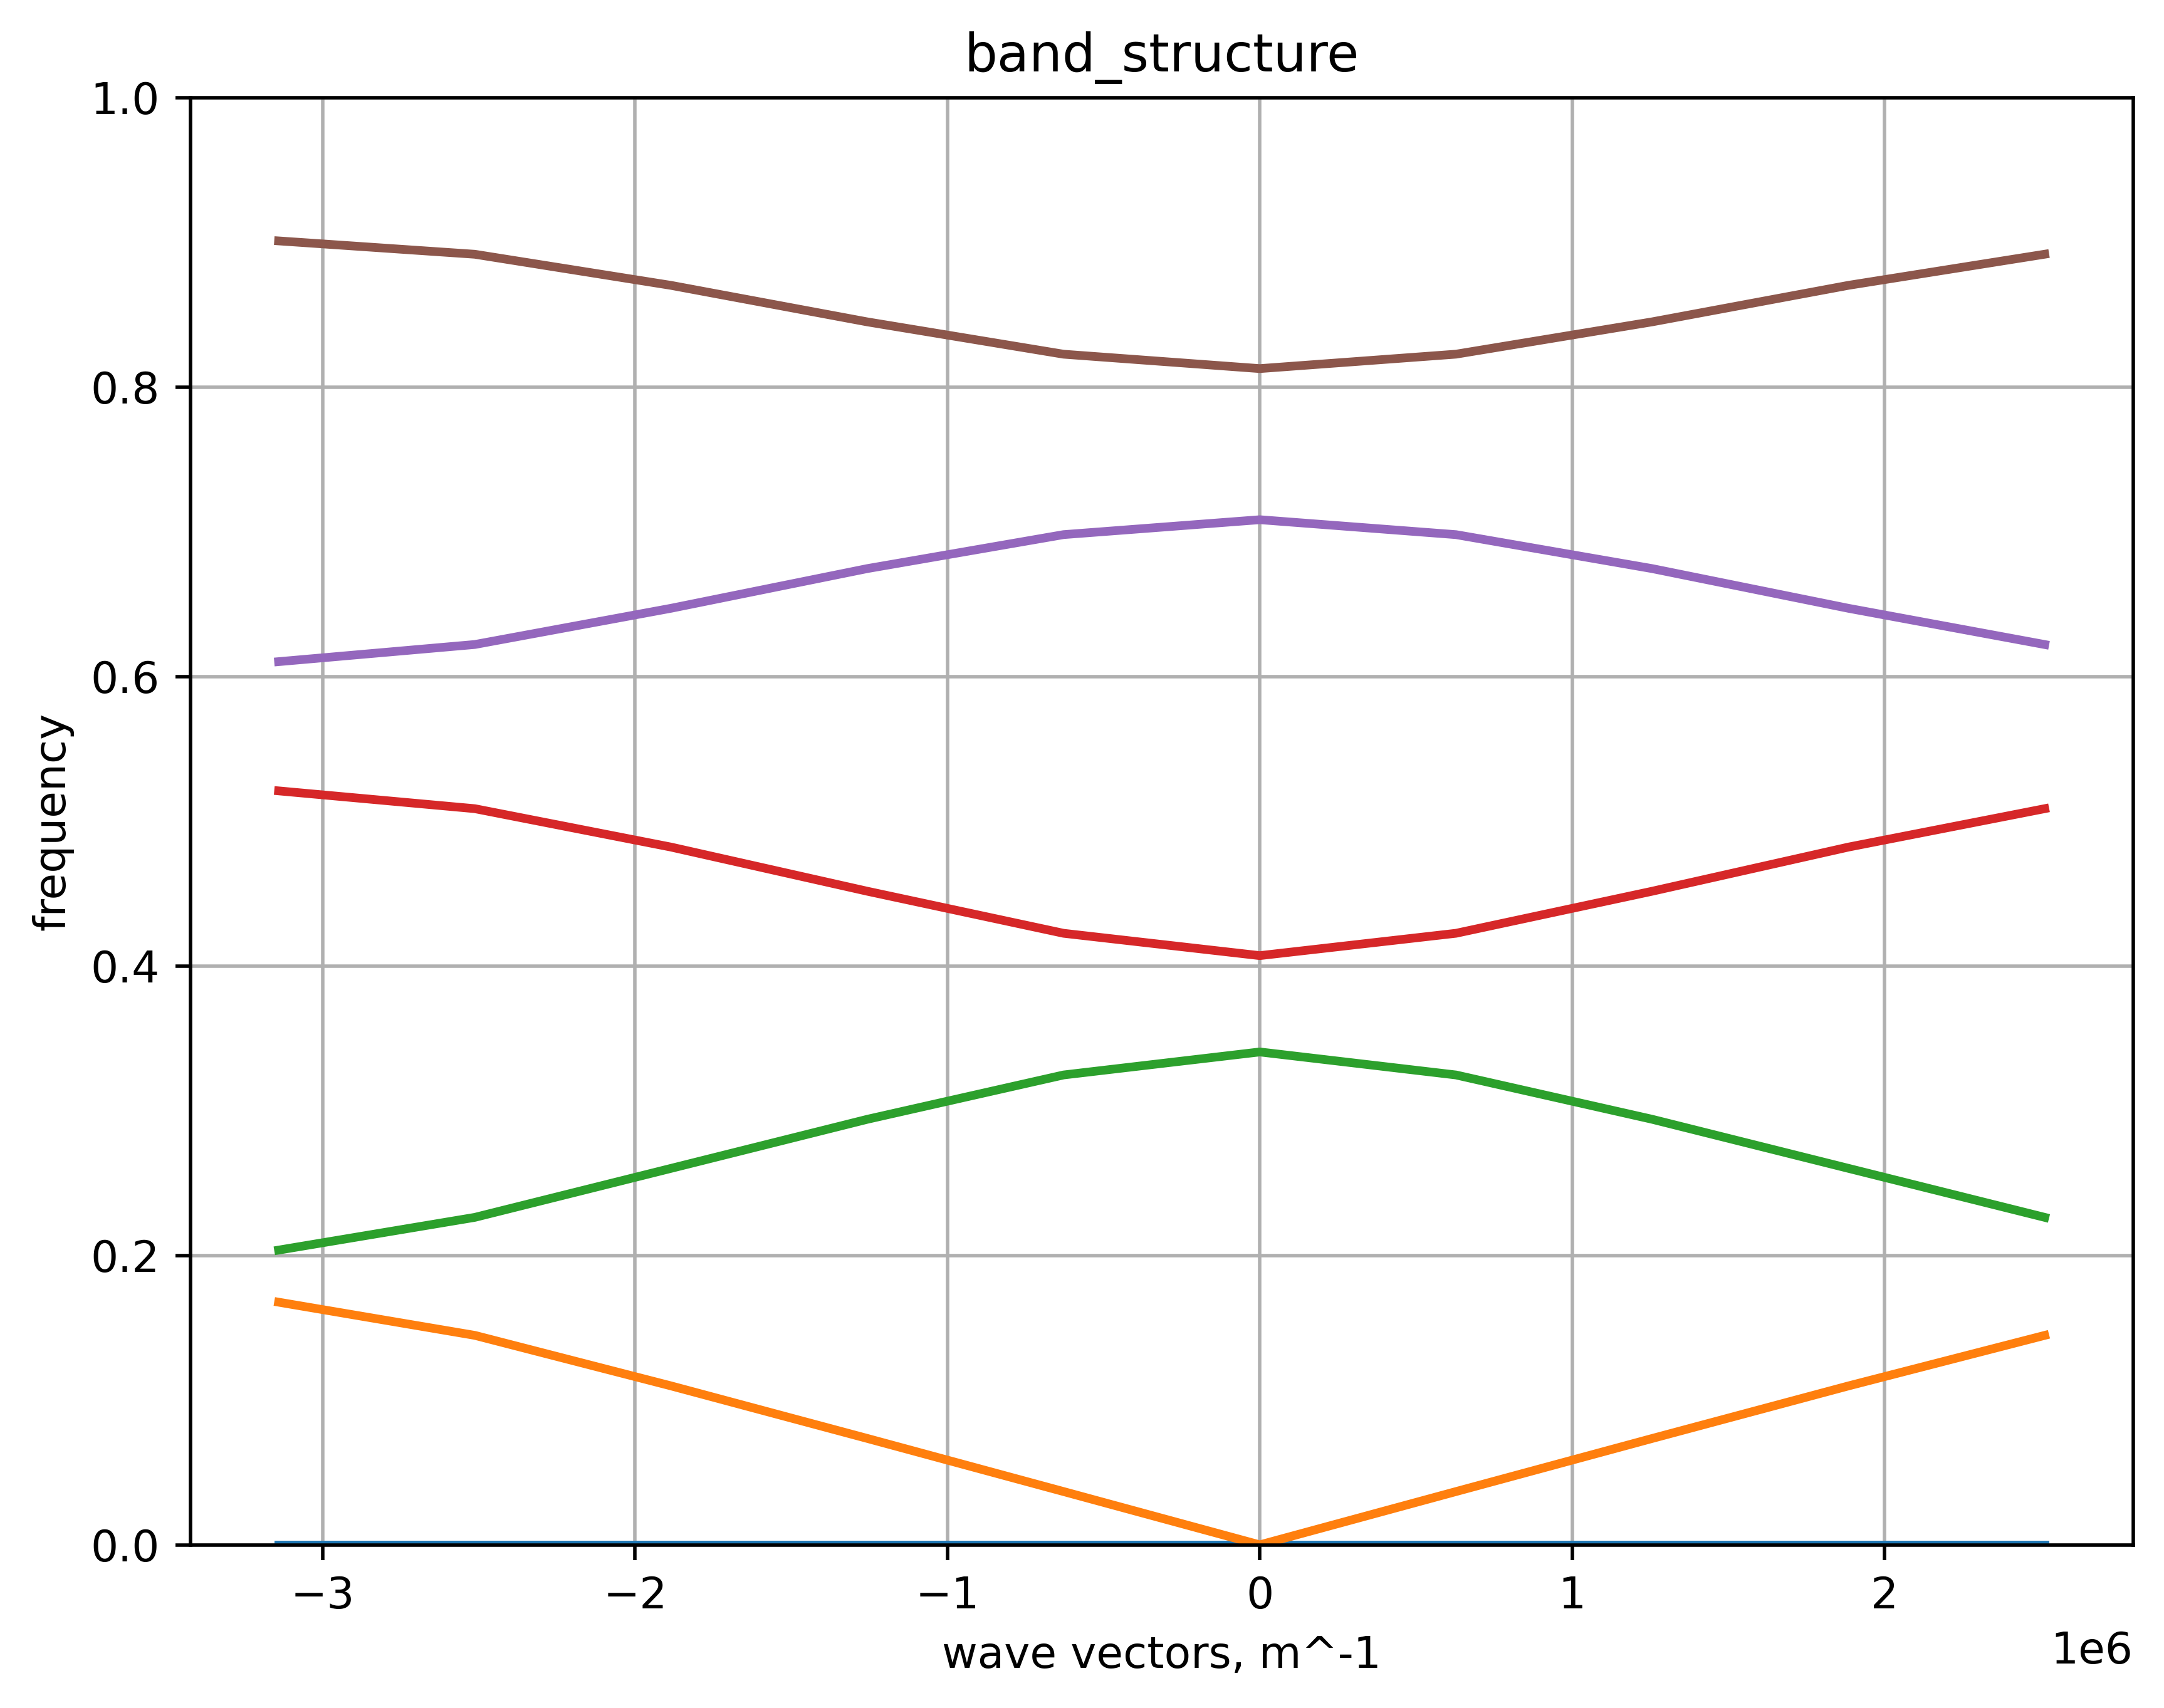

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 26 10:05:16 2025

@author: Gargi Joshi
"""
import numpy as np
import matplotlib.pyplot as plt

#unit cell of two layers

#thicknesses
t1=0.2e-6
t2=0.8e-6
a=t1+t2 #lattice constant
#permittivties
eps1=1
eps2=9

#number of plane waves in the fourier series
numG=50
#actual number of plane waves
numPW=numG*2+1 ##Y##############

G=np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a)
G1=np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a)

chi=np.zeros((numPW, numPW), dtype=complex)
M=np.zeros((numPW, numPW), dtype=complex)

for g in range(len(G)):
    for g1 in range(len(G1)):
        if G[g]==G1[g1]:
            chi[g1, g]=(1/(t1+t2))*(t1/eps1+t2/eps2)
        else:
            chi[g1, g]=1j/(t1+t2)/(G[g]-G1[g1])*(1/eps1*(np.e**(-1j* (G[g]-G1[g1])*t1)-1)+1/eps2*(np.e**(-1j* (G[g]-G1[g1])*(t1+t2))-np.e**(-1j* (G[g]-G1[g1])*t1)));

k_range=np.arange(-np.pi/a, np.pi/a, 0.2*np.pi/a)
dispersion_relations=[]
for k in range(len(k_range)):
    k_i=k_range[k]
    
    for g in range(len(G)):
        for g1 in range(len(G1)):
            M[g1, g]=chi[g1, g]*(k_i+G[g])*(k_i+G[g1])
            
    eig_val, eig_vec= np.linalg.eig(M)
    eig_val=np.sort(np.abs(eig_val))
    dispersion=np.sqrt(eig_val)*a/(2*np.pi)
    dispersion_relations.append(dispersion)
    


dispersion_relations=np.array(dispersion_relations)
n=8#how many bands to plot
plt.figure(figsize=(8,6), dpi=500)

for i in range(n):
    plt.plot(k_range, dispersion_relations[:, i], linewidth=2)

plt.ylim([0,1])
plt.xlabel('wave vectors, m^-1')
plt.ylabel('frequency')
plt.title('band_structure')
plt.grid(True)
plt.show()

